$$ \huge{Домашнее \space задание \space № \space 3}$$


$$\large{Федоров \space Павел\space Сергеевич \space 172}$$

$$Прикладная \space статистика \space в \space машинном \space обучении$$

## Задание 1

**Найдите максимум статистики Краскелла-Уоллеса.**

$H = (N - 1) \frac{\sum_{i=1}^g n_i(\overline{r_i} - \overline{r})^2}{\sum_{i=1}^g \sum_{j=1}^{n_i} (r_{ij}-\overline{r})^2}$

$H = \frac{12}{N(N+1)}\sum_{i=1}^g n_i(\overline{r_i}-\frac{N+1}{2})^2 = \frac{12}{N(N+1)}\sum_{i=1}^g n_i\overline{r_i}^2-3(N+1)$

$\overline{r_i}^2 = (\frac{\sum_{j=1}^{n_i} r_{ij}}{n_i})^2 \leq \frac{\sum_{j=1}^{n_i} r_{ij}^2}{n_i}$

$n_i\overline{r_i}^2 \leq \sum_{j=1}^{n_i} r_{ij}^2$

Макстимум статистики достигается при равенстве:

$H_{max} = \frac{12}{N(N+1)}\sum_{i=1}^g \sum_{j=1}^{n_i}r_{ij}^2-3(N+1)$

## Задание 2
**Получите данные из файла figure_skating.csv, это результаты женского фигурного катания Олимпиады-2014 года в Сочи. Сравните перцентильное и квантильное гауссовы преобразования, а также преобразование Бокса-Кокса. Для этого проведите на
полученных данных тест Шапиро-Вилкса и постройте для каждого
преобразования график изначальных оценок против преобразованных (QQ график). Сделайте вывод: какое преобразование вы бы
предпочли для дальнейшего анализа?**

In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
from scipy.stats import norm, distributions
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv("figure_skating.csv")
data = data[pd.notnull(data['Result'])]
data

,Rank,Athlete,Result,Notes
0,G,Adelina SOTNIKOVARUS,224.59,NaN
1,S,Yuna KIMKOR,219.11,NaN
2,B,Carolina KOSTNERITA,216.73,NaN
3,4,Gracie GOLDUSA,205.53,NaN
4,5,Yulia LIPNITSKAYARUS,200.57,NaN
5,6,Mao ASADAJPN,198.22,NaN
24,7,Ashley WAGNERUSA,193.20,NaN
25,8,Akiko SUZUKIJPN,186.32,NaN
26,9,Polina EDMUNDSUSA,183.25,NaN
27,10,Mae Berenice MEITEFRA,174.53,NaN


In [3]:
from scipy.stats import boxcox, shapiro
from sklearn.preprocessing import quantile_transform, power_transform
from scipy.stats.mstats import mquantiles

res = data["Result"]
n = len(data)

tests = {
    "Percentile Gaussian": quantile_transform(np.array(res).reshape(n, 1), n_quantiles = n, random_state=10, copy=True), 
    "Quantile Gaussian": quantile_transform(np.array(res).reshape(n, 1), n_quantiles = n, random_state=10, output_distribution='normal', copy=True),
    "Box-Cox":power_transform(np.array(res).reshape(n, 1), method='box-cox')
}

for k, v in tests.items():
    print("Shapiro-Wilks test for", k, "transformation equals:\n", shapiro(v), '\n')

Shapiro-Wilks test for Percentile Gaussian transformation equals:
 (0.9588580131530762, 0.41591137647628784) 

Shapiro-Wilks test for Quantile Gaussian transformation equals:
 (0.8654237985610962, 0.004284990020096302) 

Shapiro-Wilks test for Box-Cox transformation equals:
 (0.9595345258712769, 0.42914271354675293) 



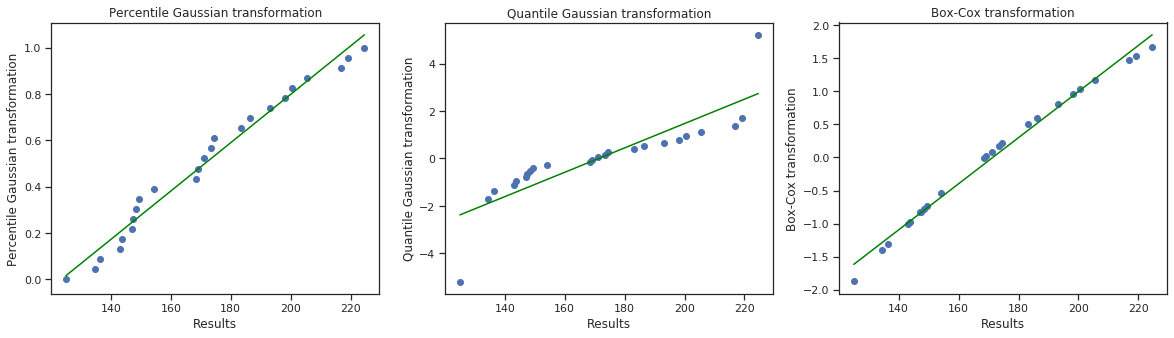

In [4]:
from numpy.polynomial.polynomial import polyfit

plt.figure(figsize=(20, 5))
i = 0
for k, v in tests.items():
    plt.subplot(1, 3, i + 1)
    plt.title(k + ' transformation')
    plt.xlabel('Results')
    plt.ylabel(k + ' transformation')
    plt.scatter(res, v)
    b, k = polyfit(res, v, 1)
    plt.plot(res, b + k * res, color='green')
    i += 1

__Вывод:__ Box-Cox дает самый лучший результат из предложенных преобразований, это хорошо видно из графиков и теста выше. Поэтому логичнее всего далее использовать его

## Задание 3

Сравните:

• Классический дисперсионный анализ (ANOVA).

• Дисперсионный анализ с использованием метода Уэлча.

• Дисперсионный анализ с использованием теста Краскела-Уоллиса.

Рассмотрите случай трёх выборок. Сделайте выводы о регионах
применимости F-теста, теста Уэлча, теста Краскела-Уоллиса для
однофакторного анализа.

In [5]:
from scipy.stats import f_oneway, kruskal

numbers = [5, 10, 20, 100]
alpha = 0.05

for i in range(len(numbers)):
    error_anova = 0
    error_welch = 0
    error_kruskal = 0
    for j in range(500):
        sample1 = np.random.normal(0, 1, numbers[i])
        sample2 = np.random.normal(0, 1, numbers[i])
        sample3 = np.random.normal(0, 1, numbers[i])
        
        _, p_val_anova = f_oneway(sample1, sample2, sample3)
        
        if p_val_anova < alpha:
            error_anova += 1
            
        _, p_val_kruskal = kruskal(sample1, sample2, sample3)
        
        if p_val_kruskal < alpha:
            error_kruskal += 1
            
        ids = [0] * len(sample1) + [1] * len(sample2) + [2] * len(sample3)
        samples = pd.DataFrame(zip(np.concatenate((sample1, sample2, sample3)), ids), columns=['Samples', 'Ids'])
        p_val_welch = pg.welch_anova(dv='Samples', between='Ids', data=samples)['p-unc'][0]
        
        if p_val_welch < alpha:
            error_welch += 1
            
    error_anova /= 500
    error_kruskal /= 500
    error_welch /= 500
    
    print('N:', numbers[i])
    print('Ошибка первого рода для Anova:', error_anova)
    print('Ошибка первого рода для Kruskal:', error_kruskal)
    print('Ошибка первого рода для Welch:', error_welch, '\n')

N: 5
Ошибка первого рода для Anova: 0.054
Ошибка первого рода для Kruskal: 0.052
Ошибка первого рода для Welch: 0.042 

N: 10
Ошибка первого рода для Anova: 0.058
Ошибка первого рода для Kruskal: 0.044
Ошибка первого рода для Welch: 0.058 

N: 20
Ошибка первого рода для Anova: 0.054
Ошибка первого рода для Kruskal: 0.052
Ошибка первого рода для Welch: 0.048 

N: 100
Ошибка первого рода для Anova: 0.05
Ошибка первого рода для Kruskal: 0.048
Ошибка первого рода для Welch: 0.052 



Можно сделать вывод, что при разных N данные методы с разной частотой допускают ошибку первого рода (при уровне значимости 0.01). Так для ANOVA лучше при бОльших N, для теста Краскела-Уоллиса при N = 10, для метода Уэлча при малых N.

## Задание 4

Исследовательская лаборатория исследует новое лекарство для лечения сенной лихорадки. В эксперименте участвует 36
волонтёров. В тесте варьировалась доза двух(2) ингредиентов (A
и B), каждый из которых давался в одной из возможных доз: маленькая, средняя и большая доза. 4 волонтёра для каждой из 9
возможных концентраций подбирались случайно. Результаты эксперимента находятся в файле fever.table.

In [6]:
data = pd.read_csv('fever.table.txt', sep='     ')
data['B'] = data[' B']
data['id'] = data[' id']
data = data[['hours', 'A', 'B', 'id']]
data.columns

Index(['hours', 'A', 'B', 'id'], dtype='object')

__a__ Используя двухфакторную модель оцените среднее, когда фактор A равен 3, а фактор B равен 2.

In [7]:
data[data['A'] == 3][data['B'] == 2].mean()['hours']

10.275

__b__ Используя QQ график, проверьте нормальность полученных
данных

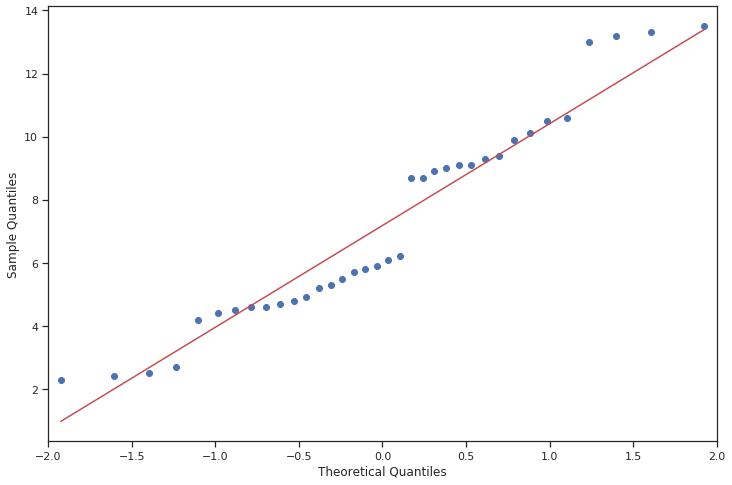

In [8]:
import statsmodels.api as sm
fig = sm.qqplot(data['hours'], line='s')
fig.set_figheight(8)
fig.set_figwidth(12)
plt.show()

__Вывод:__ По графику видно, что данные нормальны

__c__ Проверьте наличие взаимодействия факторов A и B, используя графический способ.

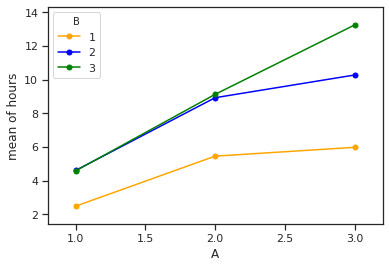

In [9]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(data['A'], data['B'], data['hours'], colors=['orange', 'blue', 'green'], ms=10)
fig.show()

__Вывод:__ По зеленому и синиму графику видно, что есть наличие взаимодействия сежду факторамии A и B.

__d__ Проверьте наличие взаимодействия факторов A и B, используя F-тест с критическим значением α = 0.05.

__e__ Проверьте наличие эффекта для каждого из факторов.

In [10]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels as sm

def eta_sq(aov):
    aov['eta_sq'] = ''
    aov['eta_sq'] = aov[:-1]['sum_sq'] / np.sum(aov['sum_sq'])
    return aov

def omega_sq(aov):
    mse = aov['sum_sq'][-1] / aov['df'][-1]
    aov['omega_sq'] =  ''
    aov['omega_sq'] = (aov[:-1]['sum_sq'] - (mse * aov[:-1]['df'])) / (mse + np.sum(aov['sum_sq']))
    return aov

model = ols('hours ~ C(B) + C(A) + C(B):C(A)', data).fit()
aov = anova_lm(model)

aov = eta_sq(aov)
aov = omega_sq(aov)
aov

,df,sum_sq,mean_sq,F,PR(>F),eta_sq,omega_sq
C(B),2.0,123.660,61.830000,1027.329231,3.348751e-26,0.329998,0.329623
C(A),2.0,220.020,110.010000,1827.858462,1.514043e-29,0.587143,0.586727
C(B):C(A),4.0,29.425,7.356250,122.226923,6.972083e-17,0.078523,0.077868
Residual,27.0,1.625,0.060185,NaN,NaN,NaN,NaN
